In [744]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib as plt

In [5]:
now = datetime.now()
now

datetime.datetime(2022, 11, 24, 19, 26, 6, 408863)

In [14]:
datetime(2017, 9, 25, 14, 5, 52, 72973)
now.year,now.month, now.day

(2022, 11, 24)

In [12]:
now.year,now.month, now.day

(2022, 11, 24)

In [18]:
delta = datetime(2022, 11, 24) - datetime(2021, 5, 5, 15, 15)
delta

datetime.timedelta(days=567, seconds=31500)

In [19]:
delta.days

567

In [20]:
delta.seconds

31500

In [22]:
start = datetime(2021, 5, 5)
start + timedelta(12)

datetime.datetime(2021, 5, 17, 0, 0)

In [24]:
start - 2* timedelta(12)

datetime.datetime(2021, 4, 11, 0, 0)

### 字符串和datetime的相互转换

#### datetime转换成字符串

In [254]:
stamp = datetime(2021, 5, 5)
str(stamp)

'2021-05-05 00:00:00'

In [28]:
stamp.strftime('%Y-%m-%d')


'2021-05-05'

#### 字符串转换成datetime

In [31]:
value = '2021-05-05'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2021, 5, 5, 0, 0)

In [32]:
datestrs=['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦
的事情，尤其是对于一些常见的日期格式。这种情况下，你可以用dateutil这个第三方包中的
parser.parse方法（pandas中已经自动安装好了）：

In [35]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [36]:
parse('Jan 31, 1998 10:45 PM')

datetime.datetime(1998, 1, 31, 22, 45)

在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：m

In [38]:
parse('6.12.2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [43]:
#pandas通常处理成组日期
datestrs = ['2021-05-09 12:00:00','1998-10-01 12:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2021-05-09 12:00:00', '1998-10-01 12:00:00'], dtype='datetime64[ns]', freq=None)

它还可以处理缺省值

In [45]:
idx = pd.to_datetime(datestrs +[None])
idx

DatetimeIndex(['2021-05-09 12:00:00', '1998-10-01 12:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [46]:
idx[2]

NaT

In [47]:
pd.isnull(idx)

array([False, False,  True])

NaT（Not a Time）是pandas中时间戳数据的null值。

### 时间序列基础

pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datatime对象表示）为索引
的Series：

In [55]:
from datetime import datetime
import numpy as np

In [255]:
dates = [datetime(2022, 1, 2), datetime(2022, 1,5),
        datetime(2022, 1, 7), datetime(2022, 1, 11),
         datetime(2022, 1, 18), datetime(2022, 1, 20)
        ]
dates

[datetime.datetime(2022, 1, 2, 0, 0),
 datetime.datetime(2022, 1, 5, 0, 0),
 datetime.datetime(2022, 1, 7, 0, 0),
 datetime.datetime(2022, 1, 11, 0, 0),
 datetime.datetime(2022, 1, 18, 0, 0),
 datetime.datetime(2022, 1, 20, 0, 0)]

In [56]:
ts = pd.Series(np.random.randn(6), index=dates)

In [57]:
ts

2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
2022-01-11   -1.472709
2022-01-18   -0.068213
2022-01-20   -0.370113
dtype: float64

In [58]:
ts.index

DatetimeIndex(['2022-01-02', '2022-01-05', '2022-01-07', '2022-01-11',
               '2022-01-18', '2022-01-20'],
              dtype='datetime64[ns]', freq=None)

跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [63]:
ts + ts[::2]

2022-01-02   -3.245485
2022-01-05         NaN
2022-01-07    2.649784
2022-01-11         NaN
2022-01-18   -0.136425
2022-01-20         NaN
dtype: float64

In [64]:
ts.index.dtype

dtype('<M8[ns]')

只要有需要，TimeStamp可以随时自动转换为datetime对象。

In [267]:
stamp = ts.index[0]
stamp_dt = stamp.strftime('%Y-%m-%d %H:%M:%S')#先使用strftime转换成字符串类型
parse(stamp_dt)#再使用parse转换成datetime格式，或者使用 datetime.strptime转换成
datetime.strptime(stamp_dt, '%Y-%m-%d %H:%M:%S')

datetime.datetime(2012, 3, 9, 9, 30)

只要有需要，TimeStamp可以随时自动转换为datetime对象。此外，它还可以存储频率信息（如果
有的话），且知道如何执行时区转换以及其他操作。稍后将对此进行详细讲解。

## 索引、选取、子集构造

In [129]:
stamp = ts.index[2]
ts[stamp]

1.3248918369387133

In [130]:
stamp

Timestamp('2022-01-07 00:00:00')

还有一种更为方便的用法：传入一个可以被解释为日期的字符串


In [77]:
ts['2022-01-05']

0.1556658601825808

In [79]:
ts['2022/1/5']

0.1556658601825808

对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片:

In [84]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    2.688546
2000-01-02   -0.448028
2000-01-03    1.090136
2000-01-04   -1.008766
2000-01-05    1.333529
                ...   
2002-09-22   -1.482377
2002-09-23    1.066108
2002-09-24   -1.470787
2002-09-25   -1.066910
2002-09-26    0.798489
Freq: D, Length: 1000, dtype: float64

In [85]:
longer_ts['2001']

2001-01-01   -1.081483
2001-01-02    0.173587
2001-01-03    0.828907
2001-01-04    0.621203
2001-01-05   -0.023710
                ...   
2001-12-27   -0.673518
2001-12-28    0.944483
2001-12-29   -0.021893
2001-12-30    1.605607
2001-12-31    0.447632
Freq: D, Length: 365, dtype: float64

In [86]:
longer_ts.shape

(1000,)

In [87]:
longer_ts['2001-05']

2001-05-01   -0.172704
2001-05-02    0.772071
2001-05-03    1.630154
2001-05-04    1.338632
2001-05-05    0.201156
2001-05-06    2.139703
2001-05-07   -0.388343
2001-05-08   -1.043599
2001-05-09    0.756941
2001-05-10   -0.698600
2001-05-11    0.301018
2001-05-12   -0.306102
2001-05-13    0.244888
2001-05-14    0.157064
2001-05-15   -1.312037
2001-05-16   -0.920206
2001-05-17    1.088420
2001-05-18   -0.916746
2001-05-19    0.552032
2001-05-20   -0.457060
2001-05-21    0.512361
2001-05-22    0.890011
2001-05-23   -0.799416
2001-05-24    0.747376
2001-05-25    1.607080
2001-05-26   -0.593533
2001-05-27   -0.253000
2001-05-28    1.355293
2001-05-29    0.482863
2001-05-30    1.731761
2001-05-31    0.241620
Freq: D, dtype: float64

In [88]:
ts[datetime(2011,1,7):]

2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
2022-01-11   -1.472709
2022-01-18   -0.068213
2022-01-20   -0.370113
dtype: float64

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于该时间序列中的时间
戳对其进行切片（即范围查询）：

In [90]:
ts


2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
2022-01-11   -1.472709
2022-01-18   -0.068213
2022-01-20   -0.370113
dtype: float64

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于该时间序列中的时间
戳对其进行切片（即范围查询）：

In [132]:
ts['2011/6/1':'2022-01-07 00:00:00']

2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
dtype: float64

跟之前一样，你可以传入字符串日期、datetime或Timestamp。注意，这样切片所产生的是原时间
序列的视图，跟NumPy数组的切片运算是一样的。
这意味着，没有数据被复制，对切片进行修改会反映到原始数据上。
此外，还有一个等价的实例方法也可以截取两个日期之间TimeSeries：

In [95]:
ts.truncate(after = '2022/1/18')

2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
2022-01-11   -1.472709
2022-01-18   -0.068213
dtype: float64

面这些操作对DataFrame也有效。例如，对DataFrame的行进行索引：

In [133]:
dates = pd.date_range('2022/1/1', periods = 100, freq = 'W-WED')
dates

DatetimeIndex(['2022-01-05', '2022-01-12', '2022-01-19', '2022-01-26',
               '2022-02-02', '2022-02-09', '2022-02-16', '2022-02-23',
               '2022-03-02', '2022-03-09', '2022-03-16', '2022-03-23',
               '2022-03-30', '2022-04-06', '2022-04-13', '2022-04-20',
               '2022-04-27', '2022-05-04', '2022-05-11', '2022-05-18',
               '2022-05-25', '2022-06-01', '2022-06-08', '2022-06-15',
               '2022-06-22', '2022-06-29', '2022-07-06', '2022-07-13',
               '2022-07-20', '2022-07-27', '2022-08-03', '2022-08-10',
               '2022-08-17', '2022-08-24', '2022-08-31', '2022-09-07',
               '2022-09-14', '2022-09-21', '2022-09-28', '2022-10-05',
               '2022-10-12', '2022-10-19', '2022-10-26', '2022-11-02',
               '2022-11-09', '2022-11-16', '2022-11-23', '2022-11-30',
               '2022-12-07', '2022-12-14', '2022-12-21', '2022-12-28',
               '2023-01-04', '2023-01-11', '2023-01-18', '2023-01-25',
      

In [98]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [100]:
long_df

,Colorado,Texas,New York,Ohio
2022-01-05,-0.488573,-0.037909,-0.616836,0.138221
2022-01-12,0.044128,-1.553364,0.091441,-0.468735
2022-01-19,-1.890373,-1.533116,-0.213571,-0.283070
2022-01-26,-0.759586,0.750122,0.237385,0.722104
2022-02-02,0.158307,1.749732,0.222498,1.805427
...,...,...,...,...
2023-11-01,0.026888,-0.205883,-0.806361,0.805693
2023-11-08,1.239165,-0.466644,0.387494,0.730094
2023-11-15,0.294777,1.252454,0.245323,0.189063
2023-11-22,0.720570,-0.495632,0.278254,0.831433


In [99]:
long_df.loc['5-2022']

,Colorado,Texas,New York,Ohio
2022-05-04,1.616759,-0.156337,-0.342254,-0.102106
2022-05-11,-0.179340,1.029836,-1.139000,-0.196827
2022-05-18,-0.954412,-1.007934,-0.781335,0.474228
2022-05-25,-1.089094,0.135177,-0.747347,0.994612


# 带有重复索引的时间序列

In [103]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

In [106]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

通过检查索引的is_unique属性，我们就可以知道它是不是唯一的:

In [108]:
dup_ts.index.is_unique

False

对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间点是否重复：

In [116]:
dup_ts['2000/1/3'] # not duplicated

4

In [120]:

dup_ts['2000/1/2'] #  duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0：


In [126]:
grouped = dup_ts.groupby(level = 0)

In [124]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

# 日期的范围、频率以及移动

pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。对于大部分
应用程序而言，这是无所谓的。但是，它常常需要以某种相对固定的频率进行分析，比如每日、每
月、每15分钟等（这样自然会在时间序列中引入缺失值）。幸运的是，pandas有一整套标准时间
序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。例如，我们可以将之前那个
时间序列转换为一个具有固定频率（每日）的时间序列，只需调用resample即可：

In [135]:
ts

2022-01-02   -1.622742
2022-01-05    0.155666
2022-01-07    1.324892
2022-01-11   -1.472709
2022-01-18   -0.068213
2022-01-20   -0.370113
dtype: float64

In [268]:
resample = ts.resample('D')#d的意思是每天的意思
resample

频率的转换（或重采样）是一个比较大的主题，稍后将专门用一节来进行讨论（11.6小节）。这
里，我将告诉你如何使用基本的频率和它的倍数。

## 生成日期范围

但你可能已经猜到pandas.date_range可用于根据指定的频率生成指定长度的DatetimeIndex：

In [141]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [142]:
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入
一个表示一段时间的数字：

In [145]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组
成的日期索引，可以传入"BM"频率（表示business end of month，表11-4是频率列表），这样就
只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [147]:
pd.date_range('2000-01-01', '2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

date_range默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [150]:
pd.date_range('2012-05-02 12:45:24', periods=5)

DatetimeIndex(['2012-05-02 12:45:24', '2012-05-03 12:45:24',
               '2012-05-04 12:45:24', '2012-05-05 12:45:24',
               '2012-05-06 12:45:24'],
              dtype='datetime64[ns]', freq='D')

有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时
间戳。normalize选项即可实现该功能：

In [152]:
pd.date_range('2012-05-02 12:56:23', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量

pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个
字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏
移量（date offset）的对象与之对应。例如，按小时计算的频率可以用Hour类表示：

In [157]:
from pandas.tseries.offsets import Hour, Minute

In [159]:
hour = Hour()

In [160]:
hour

<Hour>

In [164]:
# 传入一个整数即可定义偏移量的倍数
four_hours=Hour(4)
four_hours

<4 * Hours>

一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别名即可。在基础频
率前面放上一个整数即可创建倍数：

In [166]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [167]:
# 大部分偏移量对象都可通过加法进行连接：
Hour(2) + Minute(30)

<150 * Minutes>

In [168]:
# 同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解析为等效的表达式：
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率所描述的时间点并不是均匀分隔的。例如，"M"（日历月末）和"BM"（每月最后一个工作
日）就取决于每月的天数，对于后者，还要考虑月末是不是周末。由于没有更好的术语，我将这些
称为锚点偏移量（anchored offset）。

## WOM日期

WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每月第3
个星期五”之类的日期：

In [172]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [173]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 移动（超前和滞后）数据

移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于
执行单纯的前移或后移操作，保持索引不变：

In [176]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [177]:
ts

2000-01-31   -0.488160
2000-02-29    2.250321
2000-03-31    1.130340
2000-04-30    0.484017
Freq: M, dtype: float64

In [178]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.488160
2000-04-30    2.250321
Freq: M, dtype: float64

In [180]:
ts.shift(-2)
# 当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据

2000-01-31    1.130340
2000-02-29    0.484017
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化。可以这样
表达：

In [182]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -5.609802
2000-03-31   -0.497698
2000-04-30   -0.571795
Freq: M, dtype: float64

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已知，则可以将其传
给shift以便实现对时间戳进行位移而不是对数据进行简单位移

In [185]:
ts.shift(2, freq='M')

2000-03-31   -0.488160
2000-04-30    2.250321
2000-05-31    1.130340
2000-06-30    0.484017
Freq: M, dtype: float64

这里还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理了：

In [187]:
ts.shift(3, freq='D')

2000-02-03   -0.488160
2000-03-03    2.250321
2000-04-03    1.130340
2000-05-03    0.484017
dtype: float64

## 通过偏移量对日期进行位移

pandas的日期偏移量还可以用在datetime或Timestamp对象上：

In [190]:
from pandas.tseries.offsets import Day, MonthEnd

In [274]:
now = datetime(2011, 11, 17) 

In [275]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果加的是锚点偏移量(比如MonthEnd), 第一次增量会将原日期向前滚动到符合频率贵的下一个日期：

In [276]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [277]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

通过锚点偏移量的rollforward和rollback方法，可明确地将日期向前或向后“滚动”：

In [278]:
offset = MonthEnd()

In [279]:
offset

<MonthEnd>

In [280]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [281]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [282]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

日期偏移量还有一个巧妙的用法，即结合groupby使用这两个“滚动”方法：

In [285]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [287]:
ts

2000-01-15   -0.490538
2000-01-19    1.213593
2000-01-23    0.259952
2000-01-27   -0.085119
2000-01-31    0.296575
2000-02-04   -0.326903
2000-02-08   -0.368454
2000-02-12    1.684318
2000-02-16   -2.079710
2000-02-20   -1.252915
2000-02-24   -2.515659
2000-02-28   -0.300416
2000-03-03   -1.182014
2000-03-07   -1.502420
2000-03-11    0.197563
2000-03-15   -0.063527
2000-03-19    0.465927
2000-03-23    0.269143
2000-03-27    0.150599
2000-03-31   -0.441518
Freq: 4D, dtype: float64

In [288]:
for x in ts.groupby(offset.rollforward):
    print(x)

(Timestamp('2000-01-31 00:00:00'), 2000-01-15   -0.490538
2000-01-19    1.213593
2000-01-23    0.259952
2000-01-27   -0.085119
2000-01-31    0.296575
Freq: 4D, dtype: float64)
(Timestamp('2000-02-29 00:00:00'), 2000-02-04   -0.326903
2000-02-08   -0.368454
2000-02-12    1.684318
2000-02-16   -2.079710
2000-02-20   -1.252915
2000-02-24   -2.515659
2000-02-28   -0.300416
Freq: 4D, dtype: float64)
(Timestamp('2000-03-31 00:00:00'), 2000-03-03   -1.182014
2000-03-07   -1.502420
2000-03-11    0.197563
2000-03-15   -0.063527
2000-03-19    0.465927
2000-03-23    0.269143
2000-03-27    0.150599
2000-03-31   -0.441518
Freq: 4D, dtype: float64)


In [289]:
ts.groupby(offset.rollforward)

In [212]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.444259
2000-02-29    0.987032
2000-03-31   -0.326936
dtype: float64

## 时区处理

时间序列处理工作中最让人不爽的就是对时区的处理。许多人都选择以协调世界时（UTC，它是
格林尼治标准时间（Greenwich Mean Time）的接替者，目前已经是国际标准了）来处理时间序
列。时区是以UTC偏移量的形式表示的。例如，夏令时期间，纽约比UTC慢4小时，而在全年其他时间则比UTC慢5小时。
在Python中，时区信息来自第三方库pytz，它使Python可以使用Olson数据库（汇编了世界时区信
息）。这对历史数据非常重要，这是因为由于各地政府的各种突发奇想，夏令时转变日期（甚至
UTC偏移量）已经发生过多次改变了。就拿美国来说，DST转变时间自1900年以来就改变过多
次！
有关pytz库的更多信息，请查阅其文档。就本书而言，由于pandas包装了pytz的功能，因此你可以
不用记忆其API，只要记得时区的名称即可。时区名可以在shell中看到，也可以通过文档查看

In [218]:
import pytz

In [219]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

要从pytz中获取时区对象，使用pytz.timezone即可：

In [222]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

pandas中的方法既可以接受时区名也可以接受这些对象。

## 时区本地化和转换

默认情况下，pandas中的时间序列是单纯（naive）的时区。看看下面这个时间序列：

In [226]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')

In [228]:
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [301]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.314840
2012-03-10 09:30:00    0.672399
2012-03-11 09:30:00    0.258007
2012-03-12 09:30:00    1.164307
2012-03-13 09:30:00   -1.263774
2012-03-14 09:30:00    0.538511
Freq: D, dtype: float64

其索引的tz字段为None：

In [296]:
print(ts.index.tz)

None


从单纯到本地化的转换是通过tz_localize方法处理的

In [302]:
ts_utc = ts.tz_localize('UTC')

In [304]:
ts_utc.shape

(6,)

In [293]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区了：

In [318]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.314840
2012-03-10 04:30:00-05:00    0.672399
2012-03-11 05:30:00-04:00    0.258007
2012-03-12 05:30:00-04:00    1.164307
2012-03-13 05:30:00-04:00   -1.263774
2012-03-14 05:30:00-04:00    0.538511
Freq: D, dtype: float64

In [319]:
now = pd.datetime.now()
now.strftime('%Y-%m-%d')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


'2022-11-25'

In [320]:
now.tz_convert('America/New_York')

AttributeError: 'datetime.datetime' object has no attribute 'tz_convert'

In [309]:
# now_utc = now.tz_localize('UTC')

AttributeError: 'datetime.datetime' object has no attribute 'tz_localize'

对于上面这种时间序列（它跨越了美国东部时区的夏令时转变期），我们可以将其本地化到EST，
然后转换为UTC或柏林时间：

In [325]:
ts

2012-03-09 09:30:00    1.314840
2012-03-10 09:30:00    0.672399
2012-03-11 09:30:00    0.258007
2012-03-12 09:30:00    1.164307
2012-03-13 09:30:00   -1.263774
2012-03-14 09:30:00    0.538511
Freq: D, dtype: float64

In [322]:
ts_eastern = ts.tz_localize('America/New_York')

In [323]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.314840
2012-03-10 14:30:00+00:00    0.672399
2012-03-11 13:30:00+00:00    0.258007
2012-03-12 13:30:00+00:00    1.164307
2012-03-13 13:30:00+00:00   -1.263774
2012-03-14 13:30:00+00:00    0.538511
Freq: D, dtype: float64

In [324]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.314840
2012-03-10 15:30:00+01:00    0.672399
2012-03-11 14:30:00+01:00    0.258007
2012-03-12 14:30:00+01:00    1.164307
2012-03-13 14:30:00+01:00   -1.263774
2012-03-14 14:30:00+01:00    0.538511
Freq: D, dtype: float64

tz_localize和tz_convert也是DatetimeIndex的实例方法：

In [332]:
ts_shanghai = ts.index.tz_localize('Asia/Shanghai')

In [333]:
ts_shanghai.tz_convert('America/New_York')

DatetimeIndex(['2012-03-08 20:30:00-05:00', '2012-03-09 20:30:00-05:00',
               '2012-03-10 20:30:00-05:00', '2012-03-11 21:30:00-04:00',
               '2012-03-12 21:30:00-04:00', '2012-03-13 21:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

# 操作时区意识型Timestamp对象

跟时间序列和日期范围差不多，独立的Timestamp对象也能被从单纯型（naive）本地化为时区意
识型（time zone-aware），并从一个时区转换到另一个时区：

In [341]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

在创建Timestamp时，还可以传入一个时区信息：

In [343]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow


Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

时区意识型Timestamp对象在内部保存了一个UTC时间戳值（自UNIX纪元（1970年1月1日）算起
的纳秒数）。这个UTC值在时区转换过程中是不会发生变化的：

In [345]:
stamp_utc.value

1299902400000000000

In [346]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

当使用pandas的DateOffset对象执行时间算术运算时，运算过程会自动关注是否存在夏令时转变
期。这里，我们创建了在DST转变之前的时间戳。首先，来看夏令时转变前的30分钟：

In [351]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz = 'US/Eastern')

In [349]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [352]:
pd.Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [353]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [354]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [355]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [356]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# 不同时区之间的运算

如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC。由于时间戳其实
是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换：

In [359]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [361]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [362]:
ts

2012-03-07 09:30:00   -0.472318
2012-03-08 09:30:00    0.665698
2012-03-09 09:30:00    0.522677
2012-03-12 09:30:00    0.276697
2012-03-13 09:30:00   -0.576395
2012-03-14 09:30:00    0.457702
2012-03-15 09:30:00   -0.326010
2012-03-16 09:30:00    0.036129
2012-03-19 09:30:00    0.135549
2012-03-20 09:30:00    0.643404
Freq: B, dtype: float64

In [363]:
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [365]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.472318
2012-03-08 09:30:00+00:00    0.665698
2012-03-09 09:30:00+00:00    0.522677
2012-03-12 09:30:00+00:00    0.276697
2012-03-13 09:30:00+00:00   -0.576395
2012-03-14 09:30:00+00:00    0.457702
2012-03-15 09:30:00+00:00   -0.326010
Freq: B, dtype: float64

In [367]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00    0.522677
2012-03-12 13:30:00+04:00    0.276697
2012-03-13 13:30:00+04:00   -0.576395
2012-03-14 13:30:00+04:00    0.457702
2012-03-15 13:30:00+04:00   -0.326010
Freq: B, dtype: float64

In [369]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.045354
2012-03-12 09:30:00+00:00    0.553395
2012-03-13 09:30:00+00:00   -1.152789
2012-03-14 09:30:00+00:00    0.915403
2012-03-15 09:30:00+00:00   -0.652020
Freq: B, dtype: float64

# 时期及其算术运算

时期（period）表示的是时间区间，比如数日、数月、数季、数年等。Period类所表示的就是这种
数据类型，其构造函数需要用到一个字符串或整数，以及表11-4中的频率：

In [373]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

这里，这个Period对象表示的是从2007年1月1日到2007年12月31日之间的整段时间。只需对
Period对象加上或减去一个整数即可达到根据其频率进行位移的效果:

In [375]:
p + 5

Period('2012', 'A-DEC')

In [376]:
p-2

Period('2005', 'A-DEC')

如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量：

In [378]:
pd.Period('2014', freq = 'A-DEC')-p

<7 * YearEnds: month=12>

period_range函数可用于创建规则的时期范围：

In [381]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M')

In [382]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引：

In [384]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.294783
2000-02   -1.400947
2000-03   -0.283594
2000-04   -1.447995
2000-05    1.628553
2000-06    0.593872
Freq: M, dtype: float64

如果你有一个字符串数组，你也可以使用PeriodIndex类：

In [386]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [387]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [388]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# 时期的频率转换

Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换成当年年初或年末的一个月度时期。该任务非常简单:

In [391]:
p=pd.Period('2007', freq='A-DEC')

In [392]:
p

Period('2007', 'A-DEC')

In [395]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [396]:
 p.asfreq('M', how='end')

Period('2007-12', 'M')

你可以将Period('2007','A-DEC')看做一个被划分为多个月度时期的时间段中的游标。图11-1对此进
行了说明。对于一个不以12月结束的财政年度，月度子时期的归属情况就不一样了：

In [399]:
p = pd.Period('2007', freq='A-JUN')

In [400]:
p

Period('2007', 'A-JUN')

In [402]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [403]:
p.asfreq('M', 'end')#反正就是12个月的

Period('2007-06', 'M')

在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定
的。例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的：

In [406]:
p = pd.Period('Aug-2007', 'M')

In [407]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

完整的PeriodIndex或TimeSeries的频率转换方式也是如此：

In [491]:
rng = pd.period_range('2006', '2009', freq='A-Dec')

In [492]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [493]:
ts

2006    0.573523
2007    0.801972
2008    1.573378
2009   -0.606082
Freq: A-DEC, dtype: float64

In [494]:
ts.asfreq('M', how='start')

2006-01    0.573523
2007-01    0.801972
2008-01    1.573378
2009-01   -0.606082
Freq: M, dtype: float64

In [495]:
ts.asfreq('M', how='end')

2006-12    0.573523
2007-12    0.801972
2008-12    1.573378
2009-12   -0.606082
Freq: M, dtype: float64

这里，根据年度时期的第一个月，每年的时期被取代为每月的时期。如果我们想要每年的最后一个
工作日，我们可以使用“B”频率，并指明想要该时期的末尾：

In [496]:
ts.asfreq('B', how='end')

2006-12-29    0.573523
2007-12-31    0.801972
2008-12-31    1.573378
2009-12-31   -0.606082
Freq: B, dtype: float64

# 按季度计算的时期频率

季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的概念，通常是一年
12个月中某月的最后一个日历日或工作日。就这一点来说，时期"2012Q4"根据财年末的不同会有
不同的含义。pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC：

In [497]:
 p = pd.Period('2012Q3', freq='Q-JAN')

In [498]:
p

Period('2012Q3', 'Q-JAN')

在以1月结束的财年中，2012Q4是从11月到1月（将其转换为日型频率就明白了）。图11-2对此进
行了说明：

In [502]:
p.asfreq('B', 'start')

Period('2011-08-01', 'B')

In [501]:
p.asfreq('B', 'end')

Period('2011-10-31', 'B')

In [503]:
(p.asfreq('B', 'e') - 1).asfreq('T', 's') 

Period('2011-10-28 00:00', 'T')

In [504]:
 p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [505]:
p4pm

Period('2011-10-28 16:00', 'T')

In [430]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

period_range可用于生成季度型范围。季度型范围的算术运算也跟上面是一样的：

In [515]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [507]:
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [516]:
ts=pd.Series(np.arange(len(rng)), index=rng)

In [517]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [518]:
rng.asfreq('B', 'e') - 1

PeriodIndex(['2010-10-28', '2011-01-28', '2011-04-28', '2011-07-28',
             '2011-10-28', '2012-01-30'],
            dtype='period[B]', freq='B')

In [519]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60

In [520]:
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [521]:
 ts.index = new_rng.to_timestamp()

In [522]:
 ts.index

DatetimeIndex(['2010-10-28 16:00:00', '2011-01-28 16:00:00',
               '2011-04-28 16:00:00', '2011-07-28 16:00:00',
               '2011-10-28 16:00:00', '2012-01-30 16:00:00'],
              dtype='datetime64[ns]', freq=None)

# 将Timestamp转换为Period（及其反向过程）

通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为以时期索引：

In [533]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [534]:
ts = pd.Series(np.random.randn(3), index=rng)

In [535]:
ts

2000-01-31    0.904168
2000-02-29   -0.021775
2000-03-31   -0.401594
Freq: M, dtype: float64

In [536]:
pts=ts.to_period()

In [537]:
pts

2000-01    0.904168
2000-02   -0.021775
2000-03   -0.401594
Freq: M, dtype: float64

由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。新
PeriodIndex的频率默认是从时间戳推断而来的，你也可以指定任何别的频率。结果中允许存在重
复时期：

In [538]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [540]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [541]:
ts2

2000-01-29    1.518551
2000-01-30   -1.237701
2000-01-31    0.022902
2000-02-01    1.019241
2000-02-02   -0.784379
2000-02-03    0.415612
Freq: D, dtype: float64

In [543]:
ts2.to_period('M')

2000-01    1.518551
2000-01   -1.237701
2000-01    0.022902
2000-02    1.019241
2000-02   -0.784379
2000-02    0.415612
Freq: M, dtype: float64

In [544]:
pts=ts2.to_period()
pts

2000-01-29    1.518551
2000-01-30   -1.237701
2000-01-31    0.022902
2000-02-01    1.019241
2000-02-02   -0.784379
2000-02-03    0.415612
Freq: D, dtype: float64

In [545]:
pts.to_timestamp(how='start')

2000-01-29    1.518551
2000-01-30   -1.237701
2000-01-31    0.022902
2000-02-01    1.019241
2000-02-02   -0.784379
2000-02-03    0.415612
Freq: D, dtype: float64

# 通过数组创建PeriodIndex

固定频率的数据集通常会将时间信息分开存放在多个列中。例如，在下面这个宏观经济数据集中，
年度和季度就分别存放在不同的列中：

In [555]:
data = pd.read_csv('examples/macrodata.csv')

In [579]:
type(data)

pandas.core.frame.DataFrame

In [549]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [550]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [551]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

通过将这些数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引：


In [557]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-Dec') 

In [558]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [559]:
for i in index:
    print(i)

1959Q1
1959Q2
1959Q3
1959Q4
1960Q1
1960Q2
1960Q3
1960Q4
1961Q1
1961Q2
1961Q3
1961Q4
1962Q1
1962Q2
1962Q3
1962Q4
1963Q1
1963Q2
1963Q3
1963Q4
1964Q1
1964Q2
1964Q3
1964Q4
1965Q1
1965Q2
1965Q3
1965Q4
1966Q1
1966Q2
1966Q3
1966Q4
1967Q1
1967Q2
1967Q3
1967Q4
1968Q1
1968Q2
1968Q3
1968Q4
1969Q1
1969Q2
1969Q3
1969Q4
1970Q1
1970Q2
1970Q3
1970Q4
1971Q1
1971Q2
1971Q3
1971Q4
1972Q1
1972Q2
1972Q3
1972Q4
1973Q1
1973Q2
1973Q3
1973Q4
1974Q1
1974Q2
1974Q3
1974Q4
1975Q1
1975Q2
1975Q3
1975Q4
1976Q1
1976Q2
1976Q3
1976Q4
1977Q1
1977Q2
1977Q3
1977Q4
1978Q1
1978Q2
1978Q3
1978Q4
1979Q1
1979Q2
1979Q3
1979Q4
1980Q1
1980Q2
1980Q3
1980Q4
1981Q1
1981Q2
1981Q3
1981Q4
1982Q1
1982Q2
1982Q3
1982Q4
1983Q1
1983Q2
1983Q3
1983Q4
1984Q1
1984Q2
1984Q3
1984Q4
1985Q1
1985Q2
1985Q3
1985Q4
1986Q1
1986Q2
1986Q3
1986Q4
1987Q1
1987Q2
1987Q3
1987Q4
1988Q1
1988Q2
1988Q3
1988Q4
1989Q1
1989Q2
1989Q3
1989Q4
1990Q1
1990Q2
1990Q3
1990Q4
1991Q1
1991Q2
1991Q3
1991Q4
1992Q1
1992Q2
1992Q3
1992Q4
1993Q1
1993Q2
1993Q3
1993Q4
1994Q1
1994Q2
1994Q3

In [567]:
data.index = index

In [575]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [574]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 重采样及频率转换

重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据
聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样
（upsampling）。并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）
转换为W-FRI既不是降采样也不是升采样。
pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似
于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [664]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [665]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [666]:
ts=pd.Series(np.random.randn(len(rng)), index=rng)

In [667]:
ts

2000-01-01   -1.402545
2000-01-02    0.381351
2000-01-03    1.512443
2000-01-04    1.129453
2000-01-05   -1.606394
                ...   
2000-04-05   -0.799409
2000-04-06   -0.160178
2000-04-07    1.208878
2000-04-08   -0.639898
2000-04-09   -0.302185
Freq: D, Length: 100, dtype: float64

In [598]:
for i in ts.resample('M'):
    print(i)

(Timestamp('2000-01-31 00:00:00', freq='M'), 2000-01-01   -1.576498
2000-01-02   -0.706741
2000-01-03   -0.874714
2000-01-04    1.284827
2000-01-05    0.301698
2000-01-06   -0.149141
2000-01-07   -0.493837
2000-01-08    0.987737
2000-01-09    0.695407
2000-01-10    0.706515
2000-01-11   -0.287104
2000-01-12    0.451906
2000-01-13   -0.269523
2000-01-14   -0.190962
2000-01-15   -1.172812
2000-01-16    1.769398
2000-01-17    0.679897
2000-01-18    0.575220
2000-01-19    0.136536
2000-01-20   -0.044569
2000-01-21    1.501078
2000-01-22   -0.368236
2000-01-23   -0.077692
2000-01-24    1.403207
2000-01-25   -1.090436
2000-01-26   -0.162358
2000-01-27   -1.891721
2000-01-28    0.851042
2000-01-29    0.569248
2000-01-30    0.864485
2000-01-31   -0.613783
Freq: D, dtype: float64)
(Timestamp('2000-02-29 00:00:00', freq='M'), 2000-02-01   -1.257125
2000-02-02   -0.411418
2000-02-03   -0.741458
2000-02-04   -0.411835
2000-02-05    1.420884
2000-02-06    1.041025
2000-02-07    0.722580
2000-02-08 

In [668]:
ts.resample('M').mean()#按月进行平均值

2000-01-31   -0.092581
2000-02-29   -0.029033
2000-03-31   -0.126366
2000-04-30   -0.136683
Freq: M, dtype: float64

resample是一个灵活高效的方法，可用于处理非常大的时间序列。我将通过一系列的示例说明其
用法。表11-5总结它的一些选项。

## 降采样

将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数据不必拥有固定的频
率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。例如，要
转换到月度频率（'M'或'BM'），数据需要被划分到多个单月时间段中。各时间段都是半开放的。
一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。在用resample对数
据进行降采样时，需要考虑两样东西：

各区间哪边是闭合的。
如何标记各个聚合面元，用区间的开头还是末尾。

为了说明，我们来看一些“1分钟”数据：

In [669]:
rng = pd.date_range('2000-01-01', periods=12,freq='T')

In [670]:
ts = pd.Series(np.arange(12), index=rng)

In [671]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

 假设你想要通过求和的方式将这些数据聚合到“5分钟”块中:

In [672]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

传入的频率将会以“5分钟”的增量定义面元边界。默认情况下，面元的右边界是包含的，因此00:00
到00:05的区间中是包含00:05的。传入closed='left'会让区间以左边界闭合：

如你所见，最终的时间序列是以各面元右边界的时间戳进行标记的。传入label='right'即可用面元的右编界对其进行标记：

In [674]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

最后，你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易明白该时间戳到底表示的是哪个区间。只需通过loffset设置一个字符串或日期偏移量即可实现这个目的：

In [675]:
ts.resample('5min', closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [621]:
ts.resample('5min', closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

## OHLC重采样

金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第一个值（open，开
盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。传入
how='ohlc'即可得到一个含有这四种聚合值的DataFrame。整个过程很高效，只需一次扫描即可计
算出结果：

In [626]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


# 升采样和插值

在将数据从低频率转换到高频率时，就不需要聚合了。我们来看一个带有一些周型数据的

In [676]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000',periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [677]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.194609,-1.384908,1.433949,0.873287
2000-01-12,1.342197,-0.493135,-1.446980,0.875381


当你对这个数据进行聚合，每组只有一个值，这样就会引入缺失值。我们使用asfreq方法转换成高
频，不经过聚合：

In [678]:
for i in frame.resample('D'):
    print(i)

(Timestamp('2000-01-05 00:00:00', freq='D'),             Colorado     Texas  New York      Ohio
2000-01-05  0.194609 -1.384908  1.433949  0.873287)
(Timestamp('2000-01-06 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-07 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-08 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-09 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-10 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-11 00:00:00', freq='D'), Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: [])
(Timestamp('2000-01-12 00:00:00', freq='D'),             Colorado     Texas  New York      Ohio
2000-01-12  1.342197 -0.493135  -1.44698  0.875381)


In [635]:
df_daily = frame.resample('D').asfreq()

In [634]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.866986,2.205741,1.328639,0.008450
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.387902,-0.245879,0.262724,0.336282


假设你想要用前面的周型值填充“非星期三”。resampling的填充和插值方式跟fillna和reindex的一
样：

In [640]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.866986,2.205741,1.328639,0.008450
2000-01-06,1.387902,-0.245879,0.262724,0.336282
2000-01-07,1.387902,-0.245879,0.262724,0.336282
2000-01-08,1.387902,-0.245879,0.262724,0.336282
2000-01-09,1.387902,-0.245879,0.262724,0.336282
2000-01-10,1.387902,-0.245879,0.262724,0.336282
2000-01-11,1.387902,-0.245879,0.262724,0.336282
2000-01-12,1.387902,-0.245879,0.262724,0.336282


同样，这里也可以只填充指定的时期数（目的是限制前面的观测值的持续使用距离）:

In [642]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.866986,2.205741,1.328639,0.008450
2000-01-06,0.866986,2.205741,1.328639,0.008450
2000-01-07,0.866986,2.205741,1.328639,0.008450
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.387902,-0.245879,0.262724,0.336282


In [643]:
#注意，新的日期索引完全没必要跟旧的重叠：
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.866986,2.205741,1.328639,0.008450
2000-01-13,1.387902,-0.245879,0.262724,0.336282


## 通过时期进行重采样

对那些使用时期索引的数据进行重采样与时间戳很像：

In [682]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [684]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.679736,-1.023017,1.112737,0.591800
2000-02,-0.810623,-0.663977,-1.447558,1.883055
2000-03,-0.047380,0.762937,0.627512,0.480371
2000-04,-0.780966,0.500946,0.097061,-1.738075
2000-05,0.006737,0.118630,-0.821324,-1.140342


In [685]:
frame.iloc[23]

Colorado   -2.417560
Texas      -0.078469
New York   -0.852251
Ohio       -1.066683
Name: 2001-12, dtype: float64

In [651]:
frame.resample('A-DEC')

In [649]:
annual_frame = frame.resample('A-DEC').mean()

In [650]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.165993,0.043663,0.454106,0.278975
2001,-0.294131,-0.045572,0.276102,-0.526483


升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的值，就像asfreq
方法那样。convention参数默认为'start'，也可设置为'end'：

In [656]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.165993,0.043663,0.454106,0.278975
2000Q2,-0.165993,0.043663,0.454106,0.278975
2000Q3,-0.165993,0.043663,0.454106,0.278975
2000Q4,-0.165993,0.043663,0.454106,0.278975
2001Q1,-0.294131,-0.045572,0.276102,-0.526483
2001Q2,-0.294131,-0.045572,0.276102,-0.526483
2001Q3,-0.294131,-0.045572,0.276102,-0.526483
2001Q4,-0.294131,-0.045572,0.276102,-0.526483


In [687]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.165993,0.043663,0.454106,0.278975
2001,-0.294131,-0.045572,0.276102,-0.526483


In [688]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.165993,0.043663,0.454106,0.278975
2000Q2,-0.165993,0.043663,0.454106,0.278975
2000Q3,-0.165993,0.043663,0.454106,0.278975
2000Q4,-0.165993,0.043663,0.454106,0.278975
2001Q1,-0.294131,-0.045572,0.276102,-0.526483
2001Q2,-0.294131,-0.045572,0.276102,-0.526483
2001Q3,-0.294131,-0.045572,0.276102,-0.526483
2001Q4,-0.294131,-0.045572,0.276102,-0.526483


由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：

在降采样中，目标频率必须是源频率的子时期（subperiod）

在升采样中，目标频率必须是源频率的超时期（superperiod）。

如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频率。例如，由QMAR定义的时间区间只能升采样为A-MAR、A-JUN、A-SEP、A-DEC等：

In [663]:
 annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.165993,0.043663,0.454106,0.278975
2001Q1,-0.165993,0.043663,0.454106,0.278975
2001Q2,-0.165993,0.043663,0.454106,0.278975
2001Q3,-0.165993,0.043663,0.454106,0.278975
2001Q4,-0.294131,-0.045572,0.276102,-0.526483
2002Q1,-0.294131,-0.045572,0.276102,-0.526483
2002Q2,-0.294131,-0.045572,0.276102,-0.526483
2002Q3,-0.294131,-0.045572,0.276102,-0.526483


# 移动窗口函数

在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变
换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动窗口函数（moving window
function），其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，
移动窗口函数也会自动排除缺失值。

开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：

In [693]:
close_px_all = pd.read_csv('examples/stock_px.csv',
                          parse_dates=True, index_col=0)

In [697]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [699]:
close_px = close_px_all[['AAPL', 'MSFT','XOM']]

In [700]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [701]:
close_px = close_px.resample('B').ffill()

In [702]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


现在引入rolling运算符，它与resample和groupby很像。可以在TimeSeries或DataFrame以及一个
window（表示期数，见图11-4）上调用它：

In [705]:
close_px.AAPL

2003-01-02      7.40
2003-01-03      7.45
2003-01-06      7.45
2003-01-07      7.43
2003-01-08      7.28
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [723]:
close_px.AAPL.rolling(250)

Rolling [window=250,center=False,axis=0]

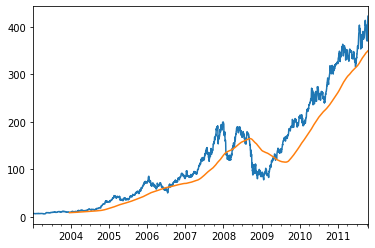

In [707]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

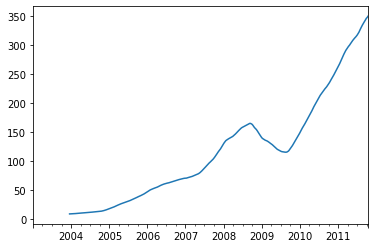

In [706]:
close_px.AAPL.rolling(250).mean().plot()

表达式rolling(250)与groupby很像，但不是对其进行分组，而是创建一个按照250天分组的滑动窗
口对象。然后，我们就得到了苹果公司股价的250天的移动窗口。
默认情况下，rolling函数需要窗口中所有的值为非NA值。可以修改该行为以解决缺失数据的问
题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特例（见图11-5）：

In [710]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [720]:
appl_std250.shape

(2292,)

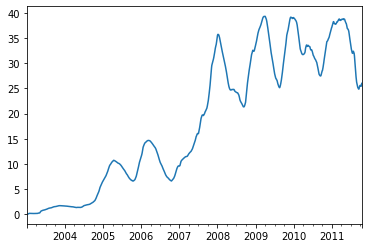

In [713]:
appl_std250[5:12]
appl_std250.plot()

要计算扩展窗口平均（expanding window mean），可以使用expanding而不是rolling。“扩展”意味
着，从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列。apple_std250时间序列的
扩展窗口平均如下所示:

In [718]:
expanding_mean = appl_std250.expanding().mean()

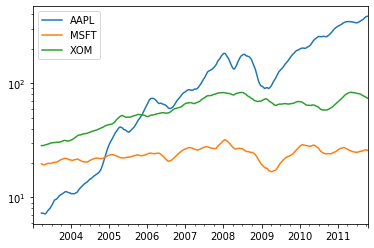

In [719]:
close_px.rolling(60).mean().plot(logy=True)

rolling函数也可以接受一个指定固定大小时间补偿字符串，而不是一组时期。这样可以方便处理不
规律的时间序列。这些字符串也可以传递给resample。例如，我们可以计算20天的滚动均值，如
下所示：

In [725]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## 指数加权函数

另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，
以便使近期的观测值拥有更大的权数。衰减因子的定义方式有很多，比较流行的是使用时间间隔
（span），它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving
window）函数。

由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变
化。

除了rolling和expanding，pandas还有ewm运算符。下面这个例子对比了苹果公司股价的30日移动
平均和span=30的指数加权移动平均（如图11-7所示）：

In [733]:
aapl_px = close_px.AAPL['2006':'2007']

In [734]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [741]:
ewma60 = aapl_px.ewm(span=30).mean()

TypeError: 'module' object is not callable

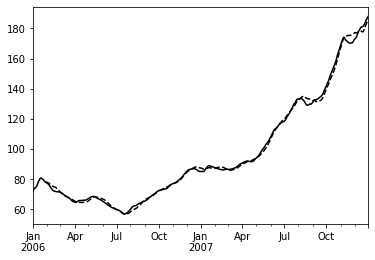

In [745]:
ma60.plot(style='k--', label='simple MA')
ewma60.plot(style='k', label='EW MA')
plt.legend()

# 二元移动窗口函数

有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。例如，金融分析师常常对某只
股票对某个参考指数（如标准普尔500指数）的相关系数感兴趣。要进行说明，我们先计算我们感
兴趣的时间序列的百分数变化：

In [748]:
spx_px = close_px_all['SPX']

In [750]:
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [749]:
spx_rets = spx_px.pct_change()

In [752]:
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [751]:
returns = close_px.pct_change()

调用rolling之后，corr聚合函数开始计算与spx_rets滚动相关系数（结果见图11-8）：

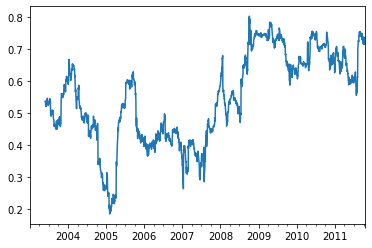

In [766]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [756]:
corr

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.736464
2011-10-11    0.729906
2011-10-12    0.728404
2011-10-13    0.727165
2011-10-14    0.729858
Length: 2292, dtype: float64

假设你想要一次性计算多只股票与标准普尔500指数的相关系数。虽然编写一个循环并新建一个
DataFrame不是什么难事，但比较啰嗦。其实，只需传入一个TimeSeries和一个DataFrame，
rolling_corr就会自动计算TimeSeries（本例中就是spx_rets）与DataFrame各列的相关系数。结果
如图11-9所示：

In [758]:
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [759]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


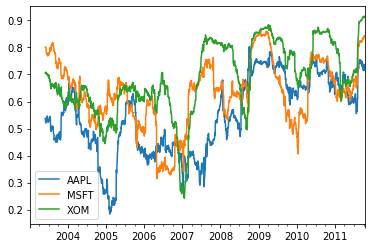

In [757]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

# 用户定义的移动窗口函数


rolling_apply函数使你能够在移动窗口上应用自己设计的数组函数。唯一要求的就是：该函数要能
从数组的各个片段中产生单个值（即约简）。比如说，当我们用rolling(...).quantile(q)计算样本分
位数时，可能对样本中特定值的百分等级感兴趣。scipy.stats.percentileofscore函数就能达到这个
目的（结果见图11-10）：

In [765]:
from scipy.stats import percentileofscore

ImportError: DLL load failed: 找不到指定的程序。

In [768]:
import matplotlib

In [770]:
from matplotlib import pyplot as plt
plt.get_cmap('RdYlBu')